In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from keras.layers import Dense, Input, Flatten
from keras.layers import Reshape, Dropout, Concatenate
from keras.layers import Conv2D, MaxPool2D, Embedding
from keras.models import Model
import os
import json
from json2html import *
from IPython.core.display import display, HTML
from tqdm import tqdm_notebook
%matplotlib inline
#nltk.download('wordnet')

Using TensorFlow backend.


In [2]:
dir = 'D:\Course Slides\Semester 3\Deep Learning for Speech\Project\ER'

In [3]:
print(os.getcwd())

D:\ML Projects\DeepLearning_Coding_Task\EmotionDetection


In [4]:
f = open(os.path.join(dir, 'train.json'), encoding="utf8")
data = json.load(f)

In [5]:
df = pd.DataFrame(data)

In [8]:
df= df.T
df.head()

,valence,activation,features
0,0,1,"[[5.502810676891276, 5.389630715979907, 5.8907..."
1,1,1,"[[5.059076172970736, 5.288492317702101, 4.2633..."
2,0,1,"[[4.218546271669202, 4.961436495859291, 3.6650..."
3,1,0,"[[4.650364321573866, 4.523905028353254, 5.0168..."
4,0,1,"[[3.900221957277269, 2.7325726489808124, 2.565..."


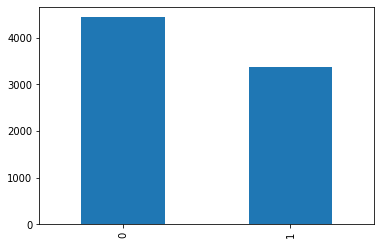

In [9]:
fig, ax = plt.subplots()
df['valence'].value_counts().plot(ax=ax, kind='bar')

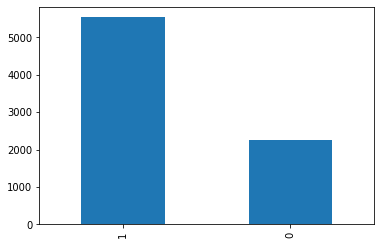

In [14]:
fig, ax = plt.subplots()
df['activation'].value_counts().plot(ax=ax, kind='bar')